<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
CS6105 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###CS6105_Lab_1.1

## Imports

In [ ]:
# import libraries
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import warnings
warnings.filterwarnings("ignore")

## Synthetic Dataset

Generate isotropic Gaussian blobs using "[make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)"


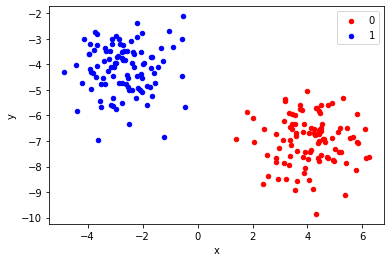

In [ ]:
## randomly generate a 2d, 2 classes dataset
# run several times the cell to observe the results

X1, y1 = make_blobs(n_samples=200, centers=2, n_features=2)
# create a data frame
df = DataFrame(dict(x=X1[:,0], y=X1[:,1], label=y1))
# two classes
colors = {0:'red', 1:'blue'}
# figure
fig, ax = plt.subplots()
grouped = df.groupby('label')
# scatter plot
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# show the plot
plt.show()

In [ ]:
# show first n rows (default 5)
df.head()

,x,y,label
0,-3.416738,-3.872255,1
1,-2.922108,-3.701750,1
2,-1.233110,-6.845470,1
3,-1.273556,-3.884929,1
4,-3.342149,-3.485187,1


In [ ]:
# count the data elements for each class
df['label'].value_counts()

1    100
0    100
Name: label, dtype: int64

## Logistic Regresion

* [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. 
* In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). 




In [ ]:
# Logistic Regression model
LR_model = LogisticRegression()
# fit to data a Logistic Regresion model
LR_model.fit(X1, y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Decision boundary from [Wikipedia](https://en.wikipedia.org/wiki/Decision_boundary): 

* A decision boundary is the region of a problem space in 
which the output label of a classifier is ambiguous.

* If the decision surface is a hyperplane, then the classification problem is linear, and the classes are linearly separable.

* In a statistical-classification problem with two classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two sets, one for each class.

* You can find a related information to this topic in this [publication](https://towardsdatascience.com/classification-problems-and-exploring-decision-boundaries-3317e03afcdb)




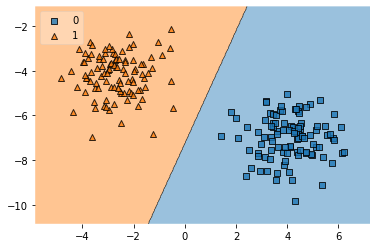

In [ ]:
# Plotting the decision boundary 
# from the LogisticRegression model
plot_decision_regions(X1, y1, clf=LR_model, legend=2)


## New Data

In [ ]:
# new data instances (10)
X_new, _ = make_blobs(n_samples=10, centers=2, n_features=2)

## Predictions

In [ ]:
# make predictions (assign class labels)
y_pred = LR_model.predict(X_new)
# show the inputs and predicted outputs
for i in range(len(X_new)):
	#print("X=%s, Class Predicted = %s" % (X_new[i], y_pred[i]))
  print("X{0} = {1}, Class Predicted = {2}".format(i, X_new[i], y_pred[i]))

X0 = [ 2.19600912 -9.91177516], Class Predicted = 0
X1 = [ 3.04073524 -8.63180656], Class Predicted = 0
X2 = [ 3.17933962 -9.56346681], Class Predicted = 0
X3 = [-2.88810914 -3.79346866], Class Predicted = 1
X4 = [  3.07644319 -10.15263134], Class Predicted = 0
X5 = [  1.37806324 -10.64645924], Class Predicted = 0
X6 = [-1.72826236 -2.58274358], Class Predicted = 1
X7 = [-2.07041821 -1.32512227], Class Predicted = 1
X8 = [-3.4731779  -1.11978988], Class Predicted = 1
X9 = [-2.18491926 -2.92240024], Class Predicted = 1


In [ ]:
# create a data frame
df_new = DataFrame(dict(x=X_new[:,0], y=X_new[:,1], label=y_pred))

In [ ]:
# show 10 rows 
df_new.head(10)

,x,y,label
0,2.196009,-9.911775,0
1,3.040735,-8.631807,0
2,3.179340,-9.563467,0
3,-2.888109,-3.793469,1
4,3.076443,-10.152631,0
5,1.378063,-10.646459,0
6,-1.728262,-2.582744,1
7,-2.070418,-1.325122,1
8,-3.473178,-1.119790,1
9,-2.184919,-2.922400,1


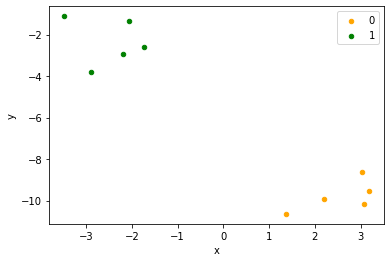

In [ ]:
# two classes
colors2 = {0:'orange', 1:'green'}
# figure
fig2, ax2 = plt.subplots()
# new data
grouped2 = df_new.groupby('label')
# scatter plot
for key2, group2 in grouped2:
    group2.plot(ax=ax2, kind='scatter', x='x', y='y', label=key2, color=colors2[key2])
# show the plot
plt.show()

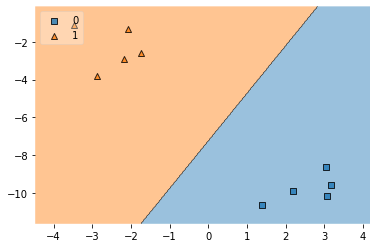

In [ ]:
# Plotting the new decision boundary 
# from the LogisticRegression model
plot_decision_regions(X_new, y_pred, clf=LR_model, legend=2)